# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.0'

In [3]:
%matplotlib inline

## Import data

In [4]:
path = r'C:\Users\justi\OneDrive\Documents\Career foundry\Data Immersion 6'

In [5]:
df_team_recruit = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'team_recruit.pkl'))

In [6]:
df_team = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'team_statistics.pkl'))

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
pd.set_option('display.max_rows', None)

In [9]:
df_team_recruit.head()

,Column1,primary_key,freshman_year,name,position,high_school,rating,stars,committed_to,recruit_type,height,weight,high_school_city,high_school_state,high_school_country,id,athlete_id,ncaa_year,ncaa_team,conference,total_games,win,loss,off_rank,def_rank
0,0,"2018, Air Force",2018,Jace Bobo,OLB,Cy-Fair,0.7953,2,Air Force,HighSchool,73,210,Cypress,TX,USA,45262,4384540,2018,Air Force,MWC,12,5,7,52,43
1,1,"2018, Air Force",2018,Malik Rodgers,WR,Shadow Creek,0.8065,3,Air Force,HighSchool,69,165,Pearland,TX,USA,45002,4568655,2018,Air Force,MWC,12,5,7,52,43
2,2,"2018, Air Force",2018,Jaylen Jones,S,Alief Hastings,0.8054,3,Air Force,HighSchool,73,205,Houston,TX,USA,45066,4569007,2018,Air Force,MWC,12,5,7,52,43
3,3,"2018, Air Force",2018,Warren Bryan,DUAL,Damien,0.7792,2,Air Force,HighSchool,74,190,La Verne,CA,USA,45775,4571641,2018,Air Force,MWC,12,5,7,52,43
4,4,"2018, Air Force",2018,Chris Kane,TE,San Clemente,0.8255,3,Air Force,HighSchool,77,213,San Clemente,CA,USA,44587,280,2018,Air Force,MWC,12,5,7,52,43


In [10]:
df_team_recruit = df_team_recruit.drop(columns = ['Column1'])

## Correlation

In [11]:
df_var = df_team_recruit[['freshman_year', 'rating', 'stars', 'height', 'weight', 'ncaa_year', 'total_games', 'win', 'loss', 'off_rank', 'def_rank']]

In [12]:
df_var.head()

,freshman_year,rating,stars,height,weight,ncaa_year,total_games,win,loss,off_rank,def_rank
0,2018,0.7953,2,73,210,2018,12,5,7,52,43
1,2018,0.8065,3,69,165,2018,12,5,7,52,43
2,2018,0.8054,3,73,205,2018,12,5,7,52,43
3,2018,0.7792,2,74,190,2018,12,5,7,52,43
4,2018,0.8255,3,77,213,2018,12,5,7,52,43


In [13]:
df_var.corr()

C:\Users\justi\AppData\Local\Temp\ipykernel_6328\3480061900.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_var.corr()


,freshman_year,rating,stars,ncaa_year,total_games,win,loss,off_rank,def_rank
freshman_year,1.000000,0.182942,0.180746,1.000000,-0.065606,-0.014643,-0.039187,-0.000310,-0.008585
rating,0.182942,1.000000,0.873372,0.182942,0.092200,0.257427,-0.240996,-0.235016,-0.158963
stars,0.180746,0.873372,1.000000,0.180746,0.053190,0.214691,-0.221760,-0.215962,-0.123357
ncaa_year,1.000000,0.182942,0.180746,1.000000,-0.065606,-0.014643,-0.039187,-0.000310,-0.008585
total_games,-0.065606,0.092200,0.053190,-0.065606,1.000000,0.607307,0.117167,-0.162523,-0.141993
win,-0.014643,0.257427,0.214691,-0.014643,0.607307,1.000000,-0.717839,-0.533214,-0.546259
loss,-0.039187,-0.240996,-0.221760,-0.039187,0.117167,-0.717839,1.000000,0.524113,0.558411
off_rank,-0.000310,-0.235016,-0.215962,-0.000310,-0.162523,-0.533214,0.524113,1.000000,0.018689
def_rank,-0.008585,-0.158963,-0.123357,-0.008585,-0.141993,-0.546259,0.558411,0.018689,1.000000


## Heatmap

C:\Users\justi\AppData\Local\Temp\ipykernel_6328\3793059337.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_heat = sns.heatmap(df_var.corr(), annot = True, ax = ax)


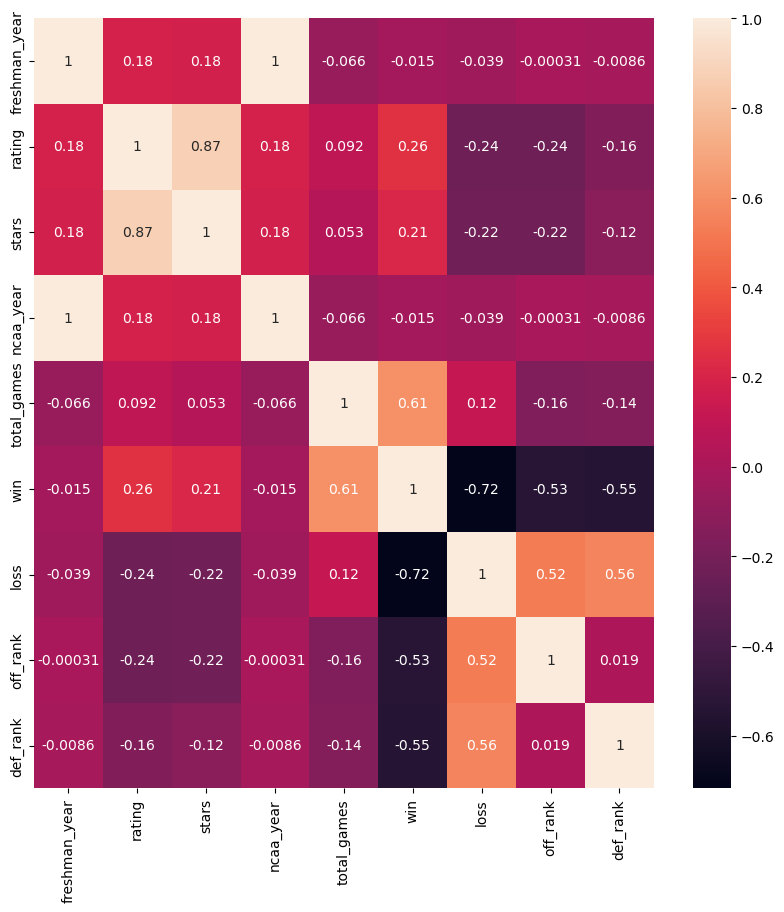

In [14]:
f,ax = plt.subplots(figsize=(10,10))
corr_heat = sns.heatmap(df_var.corr(), annot = True, ax = ax)

In [15]:
# the varibles with the highest correlation are vary intuitive. Consider the stars and ranking is created from the rating. Height and weight being correlated is also very intuitive,
# along with games and wins and losses. 
# the most interesting aspect is the correlation between rating and wins and losses, while it is a weak correlation it is still important to note. 
# It is also interesting that rating has a higher correlation with off_rank than def_rank.

## Scatterplot

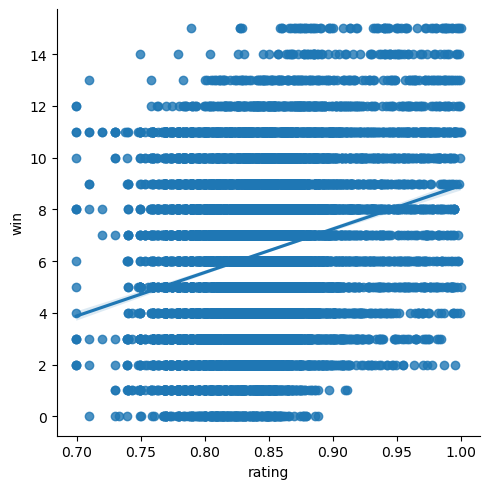

In [16]:
sns.lmplot(x = 'rating', y = 'win', data = df_team_recruit)

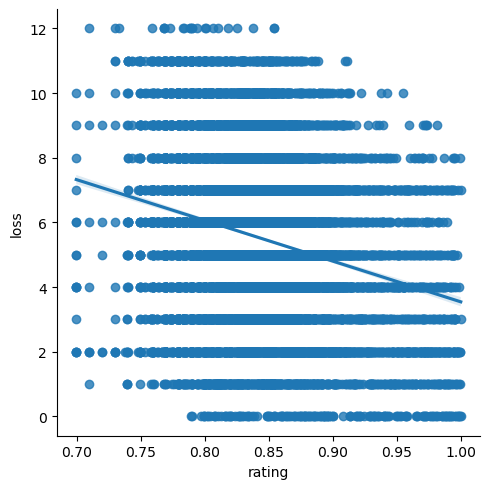

In [17]:
sns.lmplot(x = 'rating', y = 'loss', data = df_team_recruit)

In [ ]:
# These scatterplots convery the weak relationship between rating and wins/losses. As the recruit rating increases so does the number of wins the ncaa team achieves.

## Pair plot

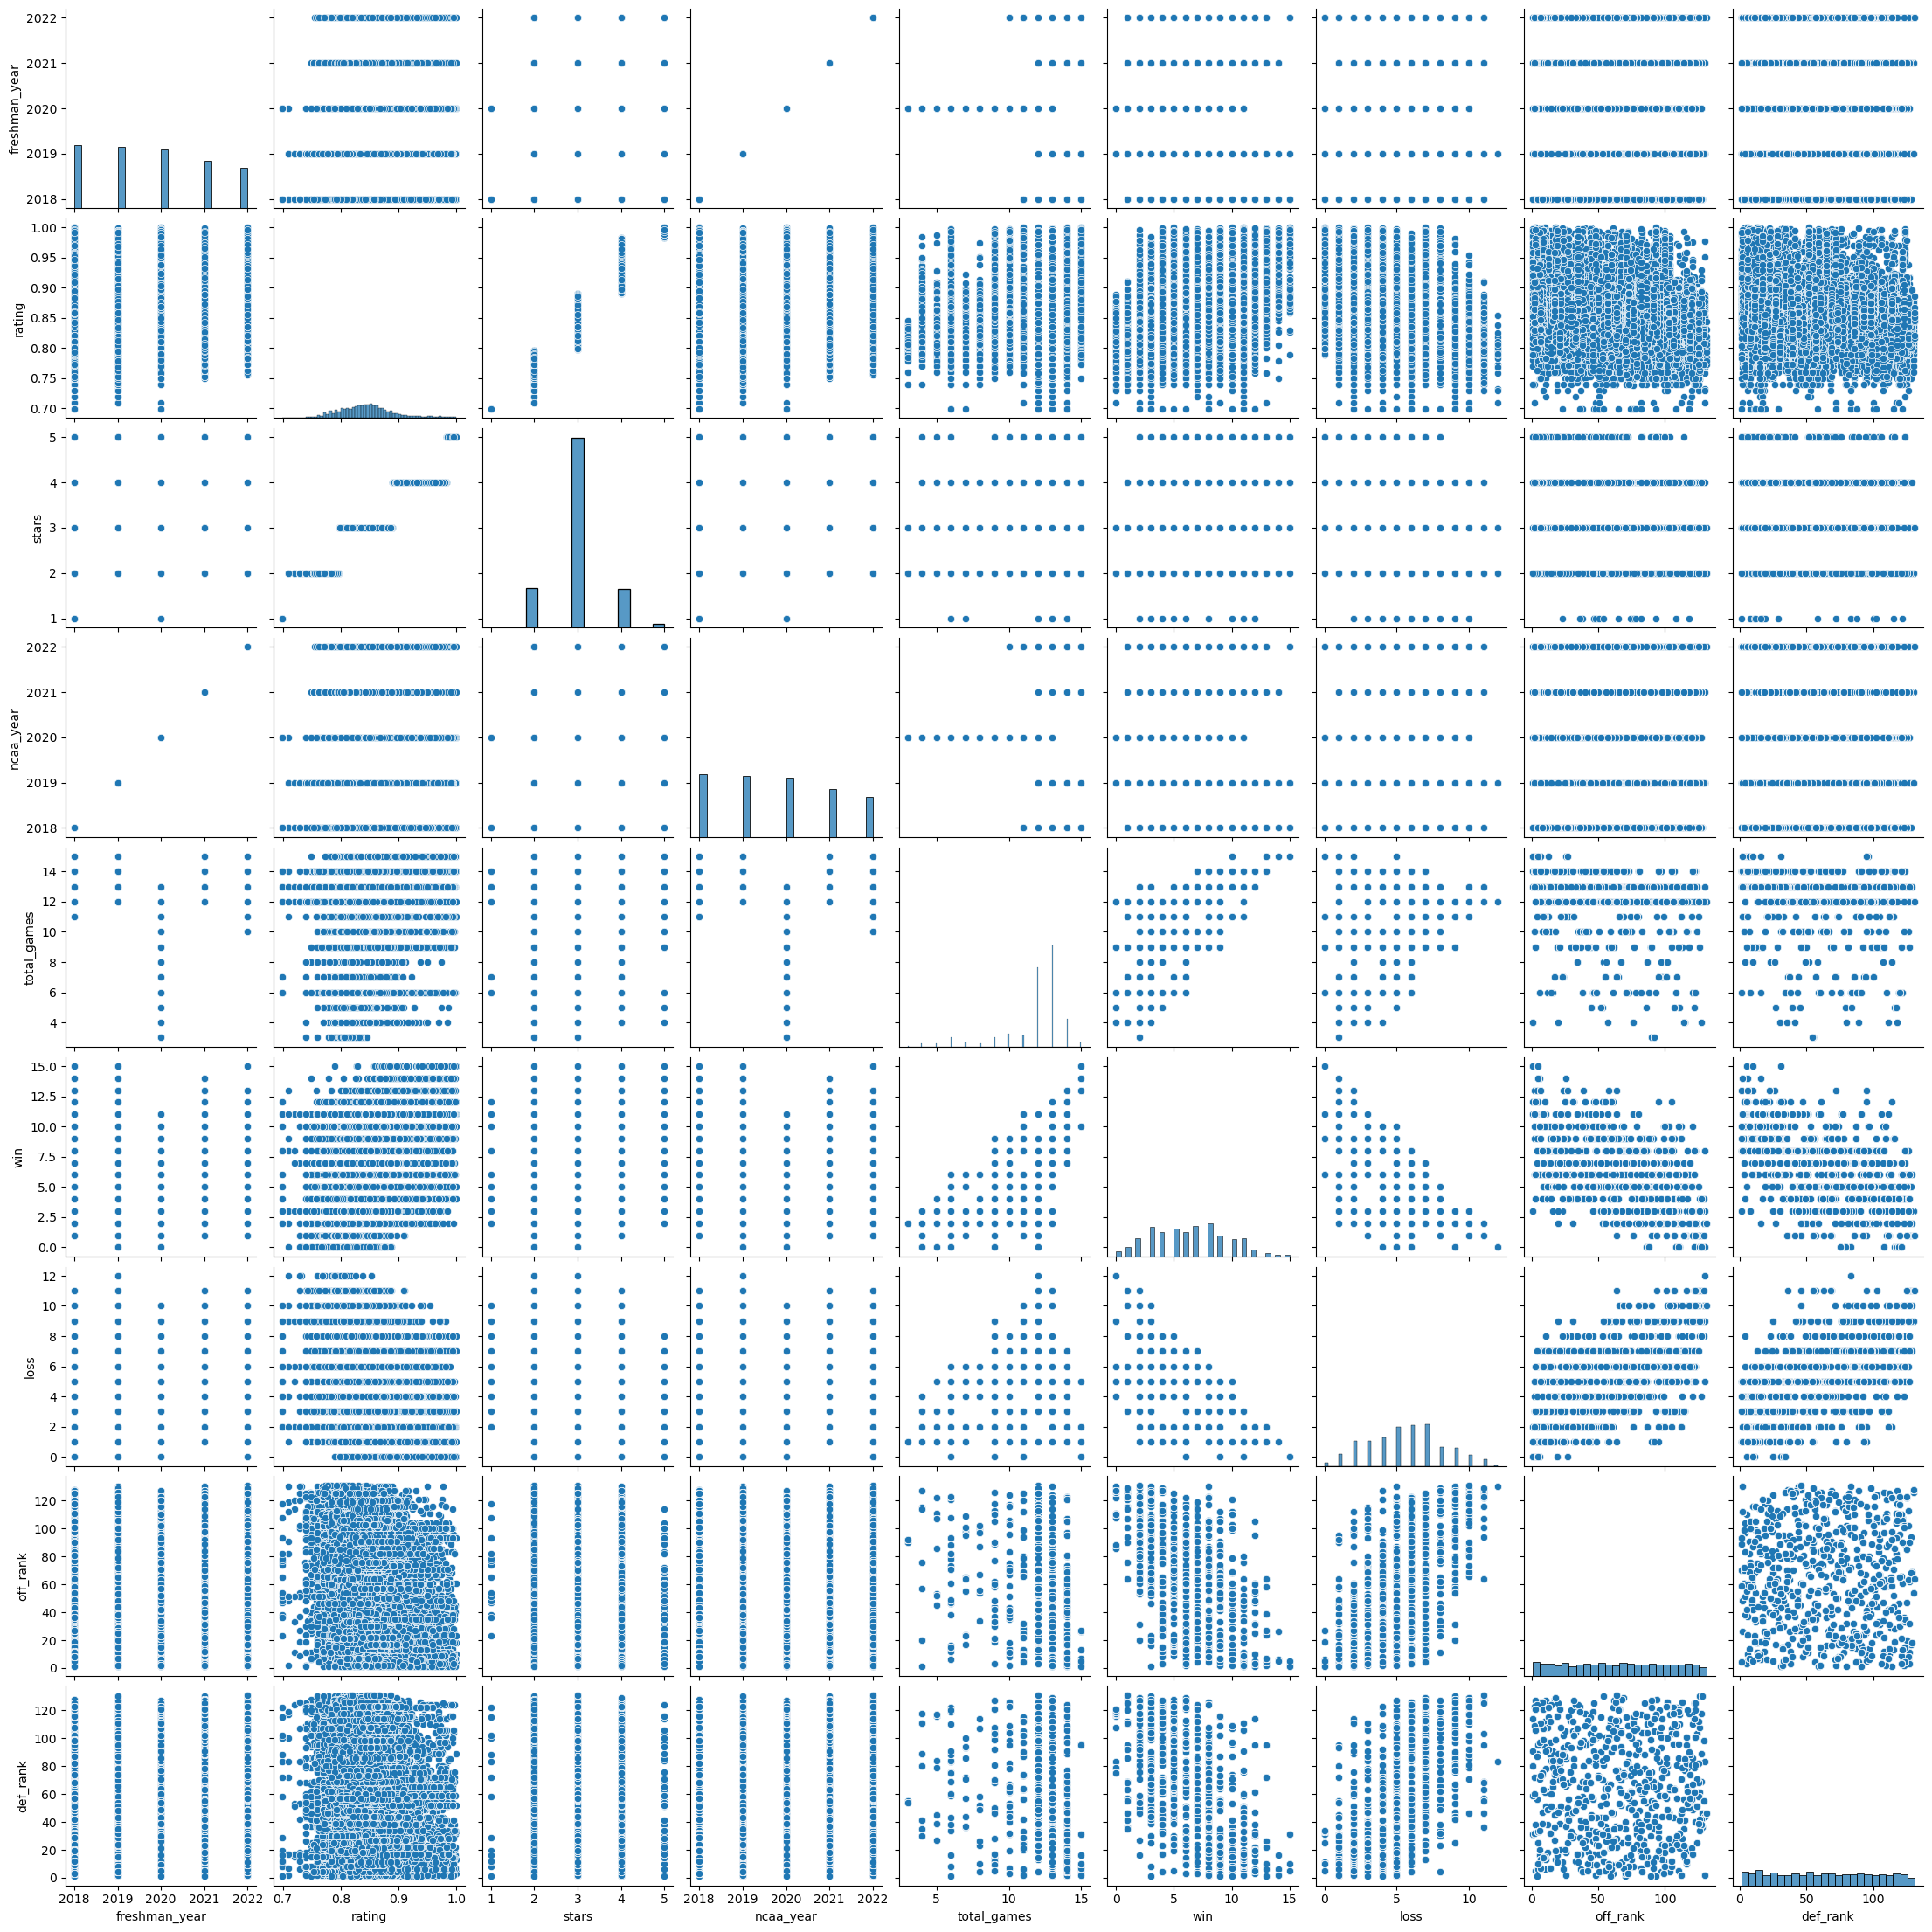

In [18]:
pairplot = sns.pairplot(df_var)

In [ ]:
# one area I would like to explore more is the relationship between rating and off_rank and def_rank. The area between an off_rank over 100 and rating is very under represented.
# However, that is not completely the case with def_rank. This could be that def_recruits do not affect def_ranking as much as offensive recruits do.

## Categorical plot

<Axes: xlabel='stars', ylabel='Count'>

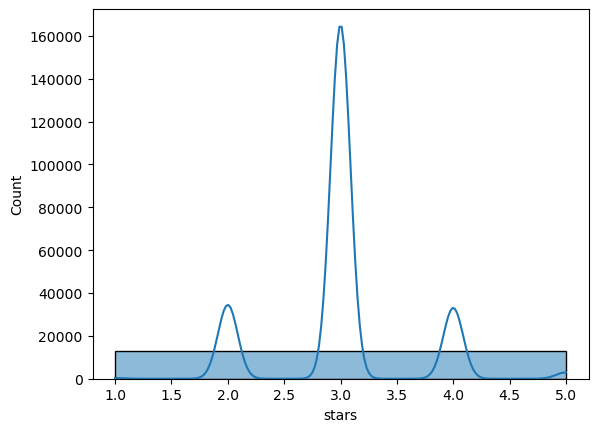

In [19]:
sns.histplot(df_team_recruit['stars'],bins = 1, kde = True)

<Axes: xlabel='rating', ylabel='Count'>

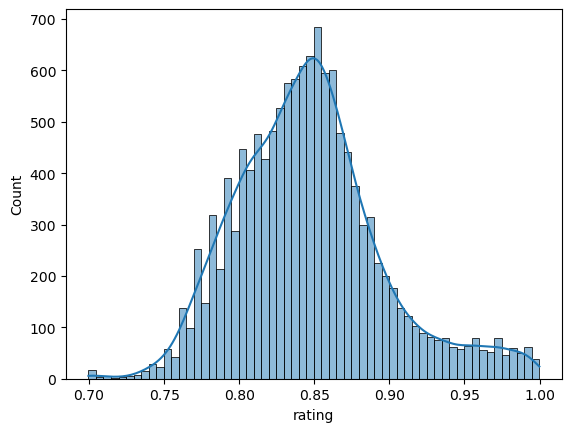

In [20]:
sns.histplot(df_team_recruit['rating'], kde = True)

In [21]:
# these two categorical plots show the majority of athletes rank in the 3 star range which correlates with around a .85 rating. 

In [22]:
df_team_recruit['rating'].describe()

count    13003.000000
mean         0.846502
std          0.048999
min          0.699600
25%          0.812500
50%          0.844200
75%          0.871900
max          0.999900
Name: rating, dtype: float64

<Axes: >

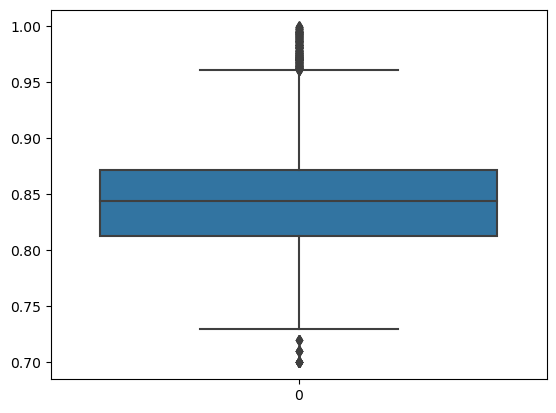

In [23]:
sns.boxplot(df_team_recruit['rating'])

In [ ]:
# This boxplot shows the rating of players

In [24]:
df_team_recruit['win'].describe()

count    13003.000000
mean         6.345305
std          3.201407
min          0.000000
25%          4.000000
50%          6.000000
75%          9.000000
max         15.000000
Name: win, dtype: float64

<Axes: >

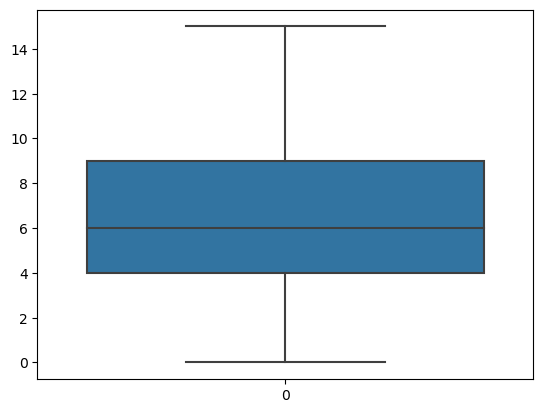

In [25]:
sns.boxplot(df_team_recruit['win'])

In [ ]:
# This boxplot shows the wins of Ncaa teams per recruit. The problem here is every recruit represents the win total for each team. There is no uniformity to the amount of recruits per team
# which causes the wins and losses to be misrepresented as some teams have more recruits than others. 

<Axes: >

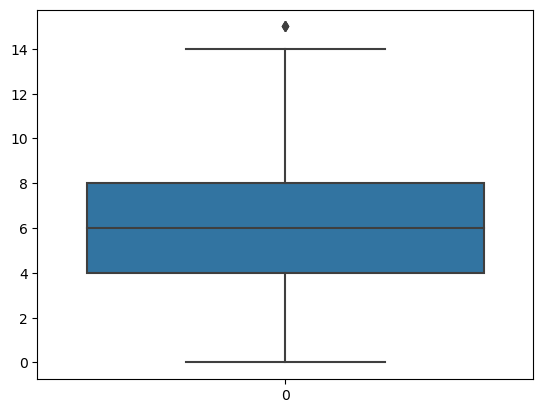

In [26]:
sns.boxplot(df_team['win'])

In [ ]:
# Here is a boxplot of the actual number of wins per Ncaa team without the recruit data.

In [27]:
df_team['win'].describe()

count    776.000000
mean       6.351804
std        3.125536
min        0.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       15.000000
Name: win, dtype: float64

## Create star ranking

In [28]:
df_team_recruit.loc[df_team_recruit['stars'] < 2, 'star_ranking'] = '1_star'

In [29]:
df_team_recruit.loc[(df_team_recruit['stars'] >= 2) & (df_team_recruit['stars'] < 3),  'star_ranking'] = '2_star'

In [30]:
df_team_recruit.loc[(df_team_recruit['stars'] >= 3) & (df_team_recruit['stars'] < 4),  'star_ranking'] = '3_star'

In [31]:
df_team_recruit.loc[(df_team_recruit['stars'] >= 4) & (df_team_recruit['stars'] < 5),  'star_ranking'] = '4_star'

In [32]:
df_team_recruit.loc[df_team_recruit['stars'] == 5, 'star_ranking'] = '5_star'

In [33]:
df_team_recruit['star_ranking'].value_counts(dropna = False)

3_star    9103
2_star    1899
4_star    1821
5_star     163
1_star      17
Name: star_ranking, dtype: int64

In [73]:
# create star_ranking in order to see star rankings easier

In [34]:
df_team_recruit['position'].value_counts(dropna = False)

WR      1527
OT      1228
CB      1197
S       1000
ATH      881
DT       752
OLB      740
RB       704
TE       654
OG       651
SDE      629
WDE      559
ILB      499
PRO      343
DUAL     269
DL       231
LB       197
OC       171
K        139
IOL      131
QB       122
APB      112
EDGE     101
P        101
LS        53
FB        11
Na         1
Name: position, dtype: int64

In [35]:
df_team_recruit.groupby('stars')['win'].describe()['mean']

stars
1    6.470588
2    5.651395
3    6.118422
4    7.913234
5    9.570552
Name: mean, dtype: float64

In [36]:
df_team_recruit.groupby('stars')['loss'].describe()['mean']

stars
1    4.882353
2    6.223802
3    5.595408
4    4.306974
5    3.067485
Name: mean, dtype: float64

In [ ]:
# Check how many wins and losses each star ranking accounts for. It may be smart to ignore the 1 star ranking as there is so little data for that ranking and is rarely used in recruiting anymore.
# As expected the average amount of wins for an Ncaa team increases as the number of stars a recruit has increases. 

## Create star_position column

In [37]:
df_team_recruit.loc[(df_team_recruit['stars'] == 5) & (df_team_recruit['position'] == 'QB'),  'star_position'] = '5_star_QB'

In [38]:
df_team_recruit.loc[(df_team_recruit['stars'] >= 4) & (df_team_recruit['stars'] < 5) & (df_team_recruit['position'] == 'QB'),  'star_position'] = '4_star_QB'

In [39]:
df_team_recruit.loc[(df_team_recruit['stars'] >= 3) & (df_team_recruit['stars'] < 4) & (df_team_recruit['position'] == 'QB'),  'star_position'] = '3_star_QB'

In [40]:
df_team_recruit.loc[(df_team_recruit['stars'] >= 2) & (df_team_recruit['stars'] < 3) & (df_team_recruit['position'] == 'QB'),  'star_position'] = '2_star_QB'

In [41]:
df_team_recruit.loc[(df_team_recruit['stars'] == 5) & (df_team_recruit['position'] == 'WR'),  'star_position'] = '5_star_WR'

In [42]:
df_team_recruit.loc[(df_team_recruit['stars'] >= 4) & (df_team_recruit['stars'] < 5) & (df_team_recruit['position'] == 'WR'),  'star_position'] = '4_star_WR'

In [43]:
df_team_recruit.loc[(df_team_recruit['stars'] >= 3) & (df_team_recruit['stars'] < 4) & (df_team_recruit['position'] == 'WR'),  'star_position'] = '3_star_WR'

In [44]:
df_team_recruit.loc[(df_team_recruit['stars'] >= 2) & (df_team_recruit['stars'] < 3) & (df_team_recruit['position'] == 'WR'),  'star_position'] = '2_star_WR'

In [45]:
df_team_recruit.loc[(df_team_recruit['stars'] == 5) & (df_team_recruit['position'] == 'OT'),  'star_position'] = '5_star_OT'
df_team_recruit.loc[(df_team_recruit['stars'] >= 4) & (df_team_recruit['stars'] < 5) & (df_team_recruit['position'] == 'OT'),  'star_position'] = '4_star_OT'
df_team_recruit.loc[(df_team_recruit['stars'] >= 3) & (df_team_recruit['stars'] < 4) & (df_team_recruit['position'] == 'OT'),  'star_position'] = '3_star_OT'
df_team_recruit.loc[(df_team_recruit['stars'] >= 2) & (df_team_recruit['stars'] < 3) & (df_team_recruit['position'] == 'OT'),  'star_position'] = '2_star_OT'

In [46]:
df_team_recruit.loc[(df_team_recruit['stars'] == 5) & (df_team_recruit['position'] == 'CB'),  'star_position'] = '5_star_CB'
df_team_recruit.loc[(df_team_recruit['stars'] >= 4) & (df_team_recruit['stars'] < 5) & (df_team_recruit['position'] == 'CB'),  'star_position'] = '4_star_CB'
df_team_recruit.loc[(df_team_recruit['stars'] >= 3) & (df_team_recruit['stars'] < 4) & (df_team_recruit['position'] == 'CB'),  'star_position'] = '3_star_CB'
df_team_recruit.loc[(df_team_recruit['stars'] >= 2) & (df_team_recruit['stars'] < 3) & (df_team_recruit['position'] == 'CB'),  'star_position'] = '2_star_CB'

In [47]:
df_team_recruit.loc[(df_team_recruit['stars'] == 5) & (df_team_recruit['position'] == 'S'),  'star_position'] = '5_star_S'
df_team_recruit.loc[(df_team_recruit['stars'] >= 4) & (df_team_recruit['stars'] < 5) & (df_team_recruit['position'] == 'S'),  'star_position'] = '4_star_S'
df_team_recruit.loc[(df_team_recruit['stars'] >= 3) & (df_team_recruit['stars'] < 4) & (df_team_recruit['position'] == 'S'),  'star_position'] = '3_star_S'
df_team_recruit.loc[(df_team_recruit['stars'] >= 2) & (df_team_recruit['stars'] < 3) & (df_team_recruit['position'] == 'S'),  'star_position'] = '2_star_S'

In [48]:
df_team_recruit.loc[(df_team_recruit['stars'] == 5) & (df_team_recruit['position'] == 'ATH'),  'star_position'] = '5_star_ATH'
df_team_recruit.loc[(df_team_recruit['stars'] >= 4) & (df_team_recruit['stars'] < 5) & (df_team_recruit['position'] == 'ATH'),  'star_position'] = '4_star_ATH'
df_team_recruit.loc[(df_team_recruit['stars'] >= 3) & (df_team_recruit['stars'] < 4) & (df_team_recruit['position'] == 'ATH'),  'star_position'] = '3_star_ATH'
df_team_recruit.loc[(df_team_recruit['stars'] >= 2) & (df_team_recruit['stars'] < 3) & (df_team_recruit['position'] == 'ATH'),  'star_position'] = '2_star_ATH'

In [49]:
df_team_recruit.loc[(df_team_recruit['stars'] == 5) & (df_team_recruit['position'] == 'DT'),  'star_position'] = '5_star_DT'
df_team_recruit.loc[(df_team_recruit['stars'] >= 4) & (df_team_recruit['stars'] < 5) & (df_team_recruit['position'] == 'DT'),  'star_position'] = '4_star_DT'
df_team_recruit.loc[(df_team_recruit['stars'] >= 3) & (df_team_recruit['stars'] < 4) & (df_team_recruit['position'] == 'DT'),  'star_position'] = '3_star_DT'
df_team_recruit.loc[(df_team_recruit['stars'] >= 2) & (df_team_recruit['stars'] < 3) & (df_team_recruit['position'] == 'DT'),  'star_position'] = '2_star_DT'

In [50]:
df_team_recruit.loc[(df_team_recruit['stars'] == 5) & (df_team_recruit['position'] == 'OLB'),  'star_position'] = '5_star_OT'
df_team_recruit.loc[(df_team_recruit['stars'] >= 4) & (df_team_recruit['stars'] < 5) & (df_team_recruit['position'] == 'OLB'),  'star_position'] = '4_star_OLB'
df_team_recruit.loc[(df_team_recruit['stars'] >= 3) & (df_team_recruit['stars'] < 4) & (df_team_recruit['position'] == 'OLB'),  'star_position'] = '3_star_OLB'
df_team_recruit.loc[(df_team_recruit['stars'] >= 2) & (df_team_recruit['stars'] < 3) & (df_team_recruit['position'] == 'OLB'),  'star_position'] = '2_star_OLB'

In [51]:
df_team_recruit.loc[(df_team_recruit['stars'] == 5) & (df_team_recruit['position'] == 'RB'),  'star_position'] = '5_star_RB'
df_team_recruit.loc[(df_team_recruit['stars'] >= 4) & (df_team_recruit['stars'] < 5) & (df_team_recruit['position'] == 'RB'),  'star_position'] = '4_star_RB'
df_team_recruit.loc[(df_team_recruit['stars'] >= 3) & (df_team_recruit['stars'] < 4) & (df_team_recruit['position'] == 'RB'),  'star_position'] = '3_star_RB'
df_team_recruit.loc[(df_team_recruit['stars'] >= 2) & (df_team_recruit['stars'] < 3) & (df_team_recruit['position'] == 'RB'),  'star_position'] = '2_star_RB'

In [52]:
df_team_recruit.loc[(df_team_recruit['stars'] == 5) & (df_team_recruit['position'] == 'TE'),  'star_position'] = '5_star_TE'
df_team_recruit.loc[(df_team_recruit['stars'] >= 4) & (df_team_recruit['stars'] < 5) & (df_team_recruit['position'] == 'TE'),  'star_position'] = '4_star_TE'
df_team_recruit.loc[(df_team_recruit['stars'] >= 3) & (df_team_recruit['stars'] < 4) & (df_team_recruit['position'] == 'TE'),  'star_position'] = '3_star_TE'
df_team_recruit.loc[(df_team_recruit['stars'] >= 2) & (df_team_recruit['stars'] < 3) & (df_team_recruit['position'] == 'TE'),  'star_position'] = '2_star_TE'

In [53]:
df_team_recruit.loc[(df_team_recruit['stars'] == 5) & (df_team_recruit['position'] == 'OG'),  'star_position'] = '5_star_OG'
df_team_recruit.loc[(df_team_recruit['stars'] >= 4) & (df_team_recruit['stars'] < 5) & (df_team_recruit['position'] == 'OG'),  'star_position'] = '4_star_OG'
df_team_recruit.loc[(df_team_recruit['stars'] >= 3) & (df_team_recruit['stars'] < 4) & (df_team_recruit['position'] == 'OG'),  'star_position'] = '3_star_OG'
df_team_recruit.loc[(df_team_recruit['stars'] >= 2) & (df_team_recruit['stars'] < 3) & (df_team_recruit['position'] == 'OG'),  'star_position'] = '2_star_OG'

In [54]:
df_team_recruit.loc[(df_team_recruit['stars'] == 5) & (df_team_recruit['position'] == 'SDE'),  'star_position'] = '5_star_SDE'
df_team_recruit.loc[(df_team_recruit['stars'] >= 4) & (df_team_recruit['stars'] < 5) & (df_team_recruit['position'] == 'SDE'),  'star_position'] = '4_star_SDE'
df_team_recruit.loc[(df_team_recruit['stars'] >= 3) & (df_team_recruit['stars'] < 4) & (df_team_recruit['position'] == 'SDE'),  'star_position'] = '3_star_SDE'
df_team_recruit.loc[(df_team_recruit['stars'] >= 2) & (df_team_recruit['stars'] < 3) & (df_team_recruit['position'] == 'SDE'),  'star_position'] = '2_star_SDE'

In [55]:
df_team_recruit.loc[(df_team_recruit['stars'] == 5) & (df_team_recruit['position'] == 'WDE'),  'star_position'] = '5_star_WDE'
df_team_recruit.loc[(df_team_recruit['stars'] >= 4) & (df_team_recruit['stars'] < 5) & (df_team_recruit['position'] == 'WDE'),  'star_position'] = '4_star_WDE'
df_team_recruit.loc[(df_team_recruit['stars'] >= 3) & (df_team_recruit['stars'] < 4) & (df_team_recruit['position'] == 'WDE'),  'star_position'] = '3_star_WDE'
df_team_recruit.loc[(df_team_recruit['stars'] >= 2) & (df_team_recruit['stars'] < 3) & (df_team_recruit['position'] == 'WDE'),  'star_position'] = '2_star_WDE'

In [56]:
df_team_recruit.loc[(df_team_recruit['stars'] == 5) & (df_team_recruit['position'] == 'ILB'),  'star_position'] = '5_star_ILB'
df_team_recruit.loc[(df_team_recruit['stars'] >= 4) & (df_team_recruit['stars'] < 5) & (df_team_recruit['position'] == 'ILB'),  'star_position'] = '4_star_ILB'
df_team_recruit.loc[(df_team_recruit['stars'] >= 3) & (df_team_recruit['stars'] < 4) & (df_team_recruit['position'] == 'ILB'),  'star_position'] = '3_star_ILB'
df_team_recruit.loc[(df_team_recruit['stars'] >= 2) & (df_team_recruit['stars'] < 3) & (df_team_recruit['position'] == 'ILB'),  'star_position'] = '2_star_ILB'

In [57]:
df_team_recruit.loc[(df_team_recruit['stars'] == 5) & (df_team_recruit['position'] == 'PRO'),  'star_position'] = '5_star_PRO'
df_team_recruit.loc[(df_team_recruit['stars'] >= 4) & (df_team_recruit['stars'] < 5) & (df_team_recruit['position'] == 'PRO'),  'star_position'] = '4_star_PRO'
df_team_recruit.loc[(df_team_recruit['stars'] >= 3) & (df_team_recruit['stars'] < 4) & (df_team_recruit['position'] == 'PRO'),  'star_position'] = '3_star_PRO'
df_team_recruit.loc[(df_team_recruit['stars'] >= 2) & (df_team_recruit['stars'] < 3) & (df_team_recruit['position'] == 'PRO'),  'star_position'] = '2_star_PRO'

In [58]:
df_team_recruit.loc[(df_team_recruit['stars'] == 5) & (df_team_recruit['position'] == 'DUAL'),  'star_position'] = '5_star_DUAL'
df_team_recruit.loc[(df_team_recruit['stars'] >= 4) & (df_team_recruit['stars'] < 5) & (df_team_recruit['position'] == 'DUAL'),  'star_position'] = '4_star_DUAL'
df_team_recruit.loc[(df_team_recruit['stars'] >= 3) & (df_team_recruit['stars'] < 4) & (df_team_recruit['position'] == 'DUAL'),  'star_position'] = '3_star_DUAL'
df_team_recruit.loc[(df_team_recruit['stars'] >= 2) & (df_team_recruit['stars'] < 3) & (df_team_recruit['position'] == 'DUAL'),  'star_position'] = '2_star_DUAL'

In [59]:
df_team_recruit.loc[(df_team_recruit['stars'] == 5) & (df_team_recruit['position'] == 'DL'),  'star_position'] = '5_star_DL'
df_team_recruit.loc[(df_team_recruit['stars'] >= 4) & (df_team_recruit['stars'] < 5) & (df_team_recruit['position'] == 'DL'),  'star_position'] = '4_star_DL'
df_team_recruit.loc[(df_team_recruit['stars'] >= 3) & (df_team_recruit['stars'] < 4) & (df_team_recruit['position'] == 'DL'),  'star_position'] = '3_star_DL'
df_team_recruit.loc[(df_team_recruit['stars'] >= 2) & (df_team_recruit['stars'] < 3) & (df_team_recruit['position'] == 'DL'),  'star_position'] = '2_star_DL'

In [60]:
df_team_recruit.loc[(df_team_recruit['stars'] == 5) & (df_team_recruit['position'] == 'LB'),  'star_position'] = '5_star_LB'
df_team_recruit.loc[(df_team_recruit['stars'] >= 4) & (df_team_recruit['stars'] < 5) & (df_team_recruit['position'] == 'LB'),  'star_position'] = '4_star_LB'
df_team_recruit.loc[(df_team_recruit['stars'] >= 3) & (df_team_recruit['stars'] < 4) & (df_team_recruit['position'] == 'LB'),  'star_position'] = '3_star_LB'
df_team_recruit.loc[(df_team_recruit['stars'] >= 2) & (df_team_recruit['stars'] < 3) & (df_team_recruit['position'] == 'LB'),  'star_position'] = '2_star_LB'

In [61]:
df_team_recruit.loc[(df_team_recruit['stars'] == 5) & (df_team_recruit['position'] == 'OC'),  'star_position'] = '5_star_OC'
df_team_recruit.loc[(df_team_recruit['stars'] >= 4) & (df_team_recruit['stars'] < 5) & (df_team_recruit['position'] == 'OC'),  'star_position'] = '4_star_OC'
df_team_recruit.loc[(df_team_recruit['stars'] >= 3) & (df_team_recruit['stars'] < 4) & (df_team_recruit['position'] == 'OC'),  'star_position'] = '3_star_OC'
df_team_recruit.loc[(df_team_recruit['stars'] >= 2) & (df_team_recruit['stars'] < 3) & (df_team_recruit['position'] == 'OC'),  'star_position'] = '2_star_OC'

In [62]:
df_team_recruit.loc[(df_team_recruit['stars'] == 5) & (df_team_recruit['position'] == 'K'),  'star_position'] = '5_star_K'
df_team_recruit.loc[(df_team_recruit['stars'] >= 4) & (df_team_recruit['stars'] < 5) & (df_team_recruit['position'] == 'K'),  'star_position'] = '4_star_K'
df_team_recruit.loc[(df_team_recruit['stars'] >= 3) & (df_team_recruit['stars'] < 4) & (df_team_recruit['position'] == 'K'),  'star_position'] = '3_star_K'
df_team_recruit.loc[(df_team_recruit['stars'] >= 2) & (df_team_recruit['stars'] < 3) & (df_team_recruit['position'] == 'K'),  'star_position'] = '2_star_K'

In [63]:
df_team_recruit.loc[(df_team_recruit['stars'] == 5) & (df_team_recruit['position'] == 'IOL'),  'star_position'] = '5_star_IOL'
df_team_recruit.loc[(df_team_recruit['stars'] >= 4) & (df_team_recruit['stars'] < 5) & (df_team_recruit['position'] == 'IOL'),  'star_position'] = '4_star_IOL'
df_team_recruit.loc[(df_team_recruit['stars'] >= 3) & (df_team_recruit['stars'] < 4) & (df_team_recruit['position'] == 'IOL'),  'star_position'] = '3_star_IOL'
df_team_recruit.loc[(df_team_recruit['stars'] >= 2) & (df_team_recruit['stars'] < 3) & (df_team_recruit['position'] == 'IOL'),  'star_position'] = '2_star_IOL'

In [64]:
df_team_recruit.loc[(df_team_recruit['stars'] == 5) & (df_team_recruit['position'] == 'APB'),  'star_position'] = '5_star_APB'
df_team_recruit.loc[(df_team_recruit['stars'] >= 4) & (df_team_recruit['stars'] < 5) & (df_team_recruit['position'] == 'APB'),  'star_position'] = '4_star_APB'
df_team_recruit.loc[(df_team_recruit['stars'] >= 3) & (df_team_recruit['stars'] < 4) & (df_team_recruit['position'] == 'APB'),  'star_position'] = '3_star_APB'
df_team_recruit.loc[(df_team_recruit['stars'] >= 2) & (df_team_recruit['stars'] < 3) & (df_team_recruit['position'] == 'APB'),  'star_position'] = '2_star_APB'

In [65]:
df_team_recruit.loc[(df_team_recruit['stars'] == 5) & (df_team_recruit['position'] == 'EDGE'),  'star_position'] = '5_star_EDGE'
df_team_recruit.loc[(df_team_recruit['stars'] >= 4) & (df_team_recruit['stars'] < 5) & (df_team_recruit['position'] == 'EDGE'),  'star_position'] = '4_star_EDGE'
df_team_recruit.loc[(df_team_recruit['stars'] >= 3) & (df_team_recruit['stars'] < 4) & (df_team_recruit['position'] == 'EDGE'),  'star_position'] = '3_star_EDGE'
df_team_recruit.loc[(df_team_recruit['stars'] >= 2) & (df_team_recruit['stars'] < 3) & (df_team_recruit['position'] == 'EDGE'),  'star_position'] = '2_star_EDGE'

In [66]:
df_team_recruit.loc[(df_team_recruit['stars'] == 5) & (df_team_recruit['position'] == 'P'),  'star_position'] = '5_star_P'
df_team_recruit.loc[(df_team_recruit['stars'] >= 4) & (df_team_recruit['stars'] < 5) & (df_team_recruit['position'] == 'P'),  'star_position'] = '4_star_P'
df_team_recruit.loc[(df_team_recruit['stars'] >= 3) & (df_team_recruit['stars'] < 4) & (df_team_recruit['position'] == 'P'),  'star_position'] = '3_star_P'
df_team_recruit.loc[(df_team_recruit['stars'] >= 2) & (df_team_recruit['stars'] < 3) & (df_team_recruit['position'] == 'P'),  'star_position'] = '2_star_P'

In [67]:
df_team_recruit.loc[(df_team_recruit['stars'] == 5) & (df_team_recruit['position'] == 'LS'),  'star_position'] = '5_star_LS'
df_team_recruit.loc[(df_team_recruit['stars'] >= 4) & (df_team_recruit['stars'] < 5) & (df_team_recruit['position'] == 'LS'),  'star_position'] = '4_star_LS'
df_team_recruit.loc[(df_team_recruit['stars'] >= 3) & (df_team_recruit['stars'] < 4) & (df_team_recruit['position'] == 'LS'),  'star_position'] = '3_star_LS'
df_team_recruit.loc[(df_team_recruit['stars'] >= 2) & (df_team_recruit['stars'] < 3) & (df_team_recruit['position'] == 'LS'),  'star_position'] = '2_star_LS'

In [68]:
df_team_recruit.loc[(df_team_recruit['stars'] == 5) & (df_team_recruit['position'] == 'FB'),  'star_position'] = '5_star_FB'
df_team_recruit.loc[(df_team_recruit['stars'] >= 4) & (df_team_recruit['stars'] < 5) & (df_team_recruit['position'] == 'FB'),  'star_position'] = '4_star_FB'
df_team_recruit.loc[(df_team_recruit['stars'] >= 3) & (df_team_recruit['stars'] < 4) & (df_team_recruit['position'] == 'FB'),  'star_position'] = '3_star_FB'
df_team_recruit.loc[(df_team_recruit['stars'] >= 2) & (df_team_recruit['stars'] < 3) & (df_team_recruit['position'] == 'FB'),  'star_position'] = '2_star_FB'

In [74]:
# assign a star ranking to each position and create a column named star_position to break down effects of recruiting by position.

In [69]:
df_team_recruit['star_position'].value_counts(dropna = False)

3_star_WR      1051
3_star_OT       892
3_star_CB       833
3_star_S        705
3_star_ATH      663
3_star_OLB      539
3_star_DT       516
3_star_RB       485
3_star_TE       483
3_star_SDE      469
3_star_OG       426
3_star_WDE      387
3_star_ILB      327
4_star_WR       278
3_star_PRO      236
2_star_CB       179
2_star_OT       179
2_star_WR       177
3_star_DL       170
3_star_DUAL     169
4_star_CB       166
4_star_S        153
3_star_LB       150
2_star_OG       146
4_star_OT       134
2_star_S        134
3_star_OC       117
2_star_DT       114
2_star_ATH      113
4_star_RB       112
4_star_DT       110
3_star_IOL      107
2_star_OLB      106
4_star_ATH       98
2_star_RB        95
3_star_QB        92
2_star_TE        91
2_star_ILB       90
4_star_OLB       87
4_star_WDE       82
2_star_WDE       81
2_star_SDE       80
4_star_TE        78
3_star_K         75
4_star_ILB       74
4_star_OG        73
4_star_SDE       72
3_star_APB       72
3_star_EDGE      66
2_star_K         64


In [75]:
# this shows the distribtution of recruits by position and star ranking 

## Star ranking 

In [70]:
df_team_recruit.groupby('star_position')['win'].describe()['mean']

star_position
2_star_APB      6.000000
2_star_ATH      5.823009
2_star_CB       5.251397
2_star_DL       6.166667
2_star_DT       5.517544
2_star_DUAL     7.500000
2_star_EDGE    10.000000
2_star_FB       5.333333
2_star_ILB      5.777778
2_star_IOL      4.285714
2_star_K        5.687500
2_star_LB       5.300000
2_star_LS       6.155556
2_star_OC       6.700000
2_star_OG       5.506849
2_star_OLB      5.660377
2_star_OT       5.748603
2_star_P        4.954545
2_star_PRO      5.958333
2_star_QB       5.000000
2_star_RB       5.705263
2_star_S        5.425373
2_star_SDE      5.800000
2_star_TE       5.494505
2_star_WDE      5.481481
2_star_WR       5.604520
3_star_APB      5.666667
3_star_ATH      6.277526
3_star_CB       6.082833
3_star_DL       6.823529
3_star_DT       6.110465
3_star_DUAL     6.065089
3_star_EDGE     6.454545
3_star_FB       5.500000
3_star_ILB      6.006116
3_star_IOL      6.467290
3_star_K        6.560000
3_star_LB       6.700000
3_star_LS       7.875000
3_star_OC  

In [76]:
# This shows the average wins a team has based on position and star ranking. This is very useful, for example it shows a 5-star edge is averaging 12.33 wins at the 
# school they attend and is the highest value per position and star ranking. While a 2-star punter is avering less than 5 wins at the school they attend and is the lowes.

In [71]:
df_team_recruit.groupby('star_position')['loss'].describe()['mean']

star_position
2_star_APB     5.272727
2_star_ATH     5.955752
2_star_CB      6.754190
2_star_DL      6.166667
2_star_DT      6.333333
2_star_DUAL    4.875000
2_star_EDGE    4.000000
2_star_FB      5.333333
2_star_ILB     6.400000
2_star_IOL     8.000000
2_star_K       6.171875
2_star_LB      7.300000
2_star_LS      5.044444
2_star_OC      5.633333
2_star_OG      6.143836
2_star_OLB     6.207547
2_star_OT      6.212291
2_star_P       6.045455
2_star_PRO     5.916667
2_star_QB      7.250000
2_star_RB      6.284211
2_star_S       6.432836
2_star_SDE     5.950000
2_star_TE      6.098901
2_star_WDE     6.506173
2_star_WR      6.435028
3_star_APB     5.305556
3_star_ATH     5.487179
3_star_CB      5.565426
3_star_DL      5.964706
3_star_DT      5.375969
3_star_DUAL    5.804734
3_star_EDGE    6.242424
3_star_FB      6.250000
3_star_ILB     5.397554
3_star_IOL     6.149533
3_star_K       5.253333
3_star_LB      6.073333
3_star_LS      4.750000
3_star_OC      5.589744
3_star_OG      5.366197
3_

In [79]:
df_team_recruit.groupby('star_ranking')['high_school_state'].value_counts()

star_ranking  high_school_state
1_star        CA                      5
              WI                      3
              CO                      2
              IL                      2
              WA                      2
              MI                      1
              NV                      1
              OH                      1
2_star        TX                    238
              CA                    234
              FL                    140
              GA                    109
              OH                     94
              NC                     77
              AL                     64
              IL                     60
              MS                     57
              SC                     57
              MI                     55
              LA                     54
              AZ                     49
              IN                     44
              VA                     43
              PA                     42
        

In [ ]:
# above shows the number of recruits per state based on star ranking. This shows the states that have the highest level of talent. For example, Texas, Florida, california, and Georgia 
# have the highest amount of 5 and 4 star recruits.

In [80]:
df_team_recruit.groupby('star_ranking')['ncaa_team'].value_counts()

star_ranking  ncaa_team            
1_star        Fresno State               2
              Wisconsin                  2
              Wyoming                    2
              Army                       1
              Cincinnati                 1
              Hawai'i                    1
              Indiana                    1
              Louisville                 1
              Michigan                   1
              Minnesota                  1
              Nevada                     1
              UCLA                       1
              UNLV                       1
              Washington                 1
2_star        Air Force                108
              Army                      98
              Navy                      89
              UTEP                      67
              New Mexico                45
              Akron                     44
              South Alabama             43
              Eastern Michigan          42
              Old 

In [ ]:
# this shows star ranking of the recruits that attend each team. This shows which teams have ammased the most talent over these years.

## Questions

In [ ]:
# Do certain positions matteer more in recruiting?
# Based on the data so far it seems different positions matter significantly in terms of wins of an ncaa team.

# Do college teams with a high blue-chip ratio win more games
# Based on a rough view of the data without applying the blue-chip ratio (# 4 and 5 star recruits divided by total) it seems the higher the ratio the more wins a team will achieve.

# Do college teams with a high percentage of recruits from their own state perform better?
# Do  college teams located in high talent areas perform better?
# It seems to be the case that the answer to both of these questions is yes. However, I will need to add the state to the ncaa team in order to get an exact answer.

# Which college teams have recruited the most talent?
# Alabama, Georgia, Texas, Texas A&m, Ohio Stat, and Oklahoma are among the teams that have the most 4 and 5 star recruits. 

## Hypotheses

In [ ]:
# If a recruit has a blue chip ratio over 80% it will have on average more than 8 wins a season.
# If an ncaa team is located in a state with a high level of highschool talent it will perform better. 

In [82]:
df_team_recruit.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'team_recruit.pkl'))

In [83]:
df_team_recruit.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'team_recruit.csv'))

In [84]:
df_team.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'team.csv'))